In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:19<00:00, 55.7MB/s]
100% 1.06G/1.06G [00:19<00:00, 59.5MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [32]:
print(keras.__version__)

2.9.0


In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=25,validation_data=validation_ds)

Epoch 1/25
625/625 [==============================] - 82s 116ms/step - loss: 1.1238 - accuracy: 0.5914 - val_loss: 0.6519 - val_accuracy: 0.6436
Epoch 2/25
625/625 [==============================] - 73s 116ms/step - loss: 0.5582 - accuracy: 0.7149 - val_loss: 0.5348 - val_accuracy: 0.7306
Epoch 3/25
625/625 [==============================] - 73s 116ms/step - loss: 0.4745 - accuracy: 0.7743 - val_loss: 0.5869 - val_accuracy: 0.7038
Epoch 4/25
625/625 [==============================] - 73s 116ms/step - loss: 0.3979 - accuracy: 0.8205 - val_loss: 0.4253 - val_accuracy: 0.7950
Epoch 5/25
625/625 [==============================] - 73s 116ms/step - loss: 0.3161 - accuracy: 0.8608 - val_loss: 0.4920 - val_accuracy: 0.7860
Epoch 6/25
625/625 [==============================] - 72s 115ms/step - loss: 0.2357 - accuracy: 0.9021 - val_loss: 0.5591 - val_accuracy: 0.7936
Epoch 7/25
625/625 [==============================] - 73s 115ms/step - loss: 0.1523 - accuracy: 0.9407 - val_loss: 0.5992 - val_ac

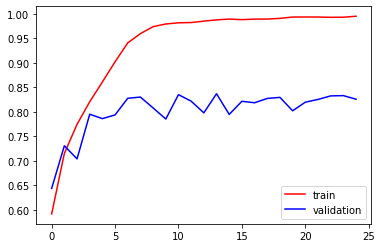

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

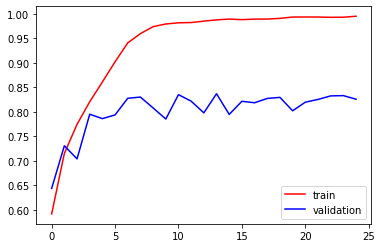

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

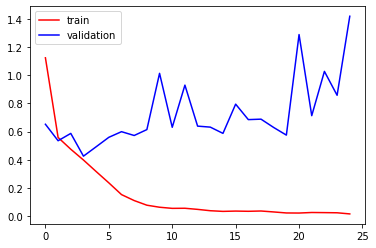

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

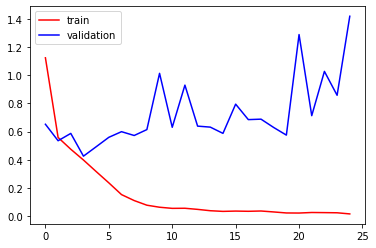

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
dogcat_classes = {0:'cats', 1:'dogs'} 

In [ ]:
dogcat_classes1 = ['cats','dogs']

In [15]:
import cv2

In [18]:
test_img = cv2.imread('/content/cat.jpg')

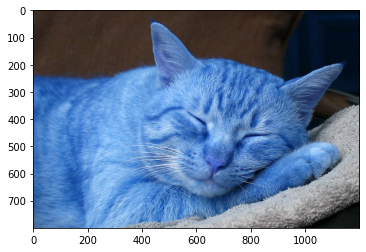

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(800, 1200, 3)

In [21]:
test_img=cv2.resize(test_img,(256,256))

In [22]:
cv2.imwrite("catcrop.png",test_img)

True

In [23]:
test_input = test_img.reshape((1,256,256,3))

In [24]:
def classify_image(inp):
  inp = inp.reshape((-1,256,256,3))
  prediction = model.predict(inp).flatten()
  if(prediction==1):
      return 'dog'
  else:
      return 'cat'
  

In [25]:
output=classify_image(test_img)
print(output)

1/1 [==============================] - 0s 249ms/step
cat


In [26]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 15.7 MB/s 
     |████████████████████████████████| 270 kB 72.8 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 2.3 MB 54.1 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 212 kB 68.3 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 112 kB 68.9 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 10.0 MB/s 
     |████████████████████████████████| 68 kB 7.0 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 856 kB 59.8 MB/s 
     |████████████████████████████████| 593 kB 6

In [27]:
import gradio as gr

In [28]:
image = gr.inputs.Image(shape=(256,256))

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [29]:
label = gr.outputs.Label(num_top_classes=2)

/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [30]:
gr.Interface(fn=classify_image, 
             inputs=image,outputs=label,
             title='Dogs and cats Classification',
             interpretation='default').launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://f8bdaebc58d9269b.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f1d2f1e2210>,
 'http://127.0.0.1:7860/',
 'https://f8bdaebc58d9269b.gradio.app')